In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython import display
import pylab as pl
import seaborn as sns
import time
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
pd.set_option('display.max_rows', None)

### Loading and splitting the dataset

In [3]:
#Loading the dataset
iris = pd.read_csv("C:/Users/fetih.kaya/Desktop/Iris.csv")
iris = iris.drop(['Id'], axis=1)

In [4]:
#Splitting dependent variables and target variables
iris_x = iris.drop(['Species'], axis=1)
iris_y = iris.Species

### K-means algorithm application 5 times with different initial centroids 

In [5]:
pred_dist = pd.DataFrame()
init_center = pd.DataFrame()

for i in range(5):
    init_center_ = iris_x.sample(3).to_numpy()

    kmeans = KMeans(n_clusters=3, random_state=2, init=init_center_, n_init=1).fit(iris_x)
    y_pred = kmeans.predict(iris_x)

    y_pred = pd.DataFrame(y_pred, columns=['Species'])  
    init_center_ = pd.DataFrame(init_center_)
    
    pred_dist = pd.concat([pred_dist, y_pred.Species.value_counts()], axis=1)
    init_center = pd.concat([init_center, init_center_], axis=1)
    
pred_dist = pred_dist.T
pred_dist.index = ['Trial 1','Trial 2', 'Trial 3', 'Trial 4', 'Trial 5']
pred_dist.columns = ['Cluster 1', 'Cluster 2', 'Cluster 3']

init_center.index = ['Centroid 1','Centroid 2', 'Centroid 3']
init_center.columns = ['Trial 1 - D1', 'Trial 1 - D2', 'Trial 1 - D3', 'Trial 1 - D4',
                          'Trial 2 - D1', 'Trial 2 - D2', 'Trial 2 - D3', 'Trial 2 - D4',
                          'Trial 3 - D1', 'Trial 3 - D2', 'Trial 3 - D3', 'Trial 3 - D4',
                          'Trial 4 - D1', 'Trial 4 - D2', 'Trial 4 - D3', 'Trial 4 - D4',
                          'Trial 5 - D1', 'Trial 5 - D2', 'Trial 5 - D3', 'Trial 5 - D4']

print(pred_dist)
print(init_center)


         Cluster 1  Cluster 2  Cluster 3
Trial 1         50         61         39
Trial 2         96         22         32
Trial 3         30         24         96
Trial 4         38         62         50
Trial 5         50         38         62
            Trial 1 - D1  Trial 1 - D2  Trial 1 - D3  Trial 1 - D4  \
Centroid 1           4.6           3.1           1.5           0.2   
Centroid 2           5.7           2.6           3.5           1.0   
Centroid 3           5.7           3.0           4.2           1.2   

            Trial 2 - D1  Trial 2 - D2  Trial 2 - D3  Trial 2 - D4  \
Centroid 1           6.8           3.0           5.5           2.1   
Centroid 2           4.4           3.2           1.3           0.2   
Centroid 3           5.0           3.2           1.2           0.2   

            Trial 3 - D1  Trial 3 - D2  Trial 3 - D3  Trial 3 - D4  \
Centroid 1           5.1           3.5           1.4           0.2   
Centroid 2           4.9           3.1           1.5

### Real species distribution of flowers

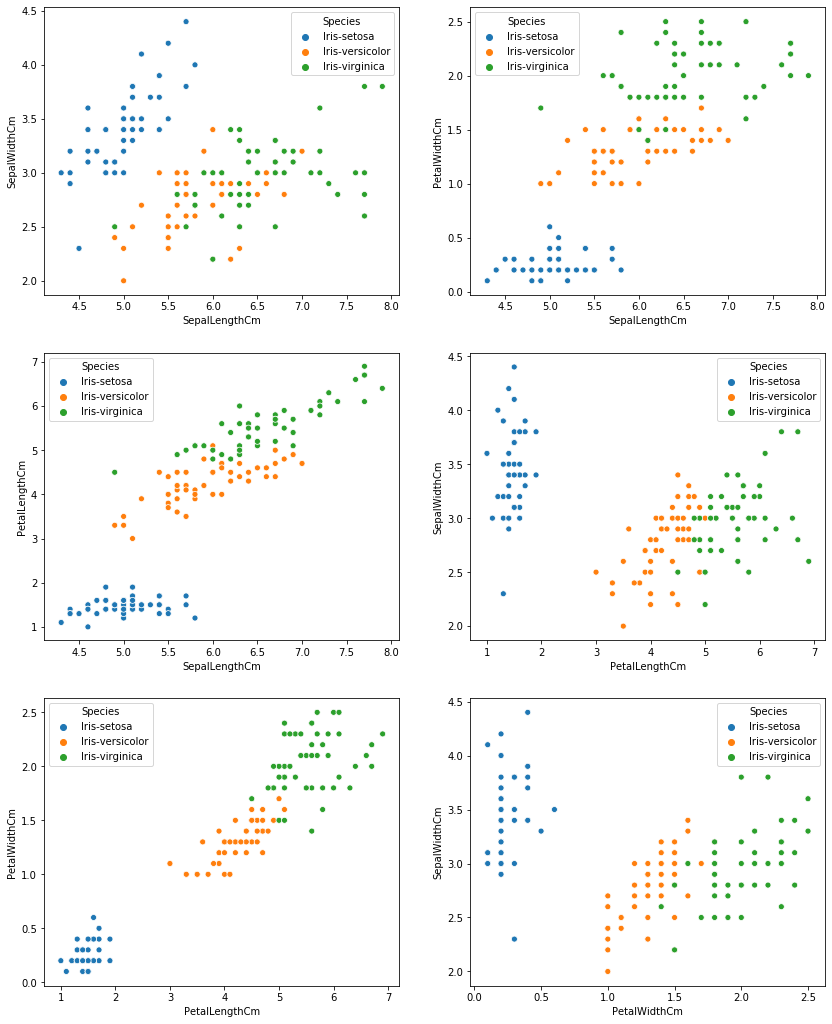

In [6]:
#Distribution of points in 2D
fig, ax = plt.subplots(3,2)
fig.set_size_inches(14, 18)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', ax = ax[0,0])
sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', data=iris, hue='Species', ax = ax[0,1])
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=iris, hue='Species', ax = ax[1,0])
sns.scatterplot(x='PetalLengthCm', y='SepalWidthCm', data=iris, hue='Species', ax = ax[1,1])
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species', ax = ax[2,0])
sns.scatterplot(x='PetalWidthCm', y='SepalWidthCm', data=iris, hue='Species', ax = ax[2,1])

### 2D plots for selected 2 dimensions for 3 clusters

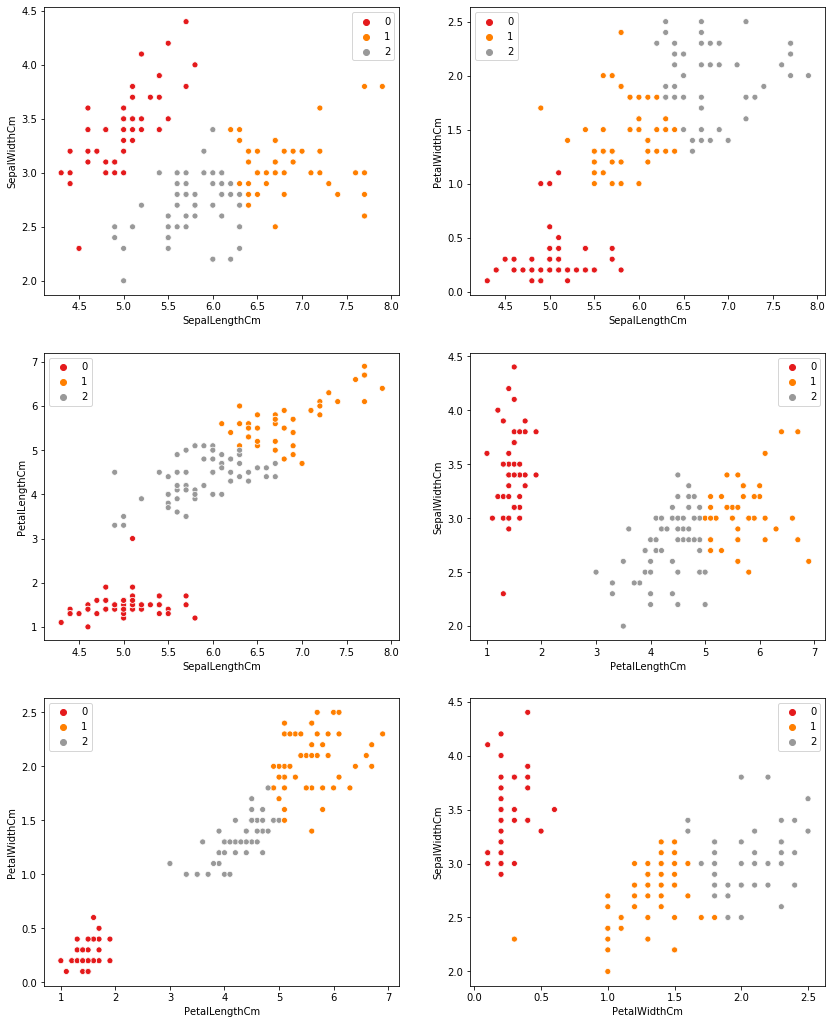

In [7]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(14, 18)

#SepalLength and SepalWidth

iris_sub = iris_x.drop(['PetalLengthCm','PetalWidthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

sns.color_palette("Set1")

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue=y_pred, palette='Set1', ax = ax[0,0])



#SepalLength and PetalWidth

iris_sub = iris_x.drop(['PetalLengthCm','SepalWidthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

sns.color_palette("Set1")

sns.scatterplot(x='SepalLengthCm', y='PetalWidthCm', data=iris, hue=y_pred, palette='Set1', ax = ax[0,1])



#SepalLength and PetalLength

iris_sub = iris_x.drop(['PetalWidthCm','SepalWidthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

sns.color_palette("Set1")

sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=iris, hue=y_pred, palette='Set1', ax = ax[1,0])



#PetalLength and SepalWidth

iris_sub = iris_x.drop(['PetalWidthCm','SepalLengthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

sns.color_palette("Set1")

sns.scatterplot(x='PetalLengthCm', y='SepalWidthCm', data=iris, hue=y_pred, palette='Set1', ax = ax[1,1])



#PetalLength and PetalWidth

iris_sub = iris_x.drop(['SepalWidthCm','SepalLengthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

sns.color_palette("Set1")

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue=y_pred, palette='Set1', ax = ax[2,0])



#PetalWidth and SepalWidth

iris_sub = iris_x.drop(['PetalLengthCm','SepalLengthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

sns.color_palette("Set1")

sns.scatterplot(x='PetalWidthCm', y='SepalWidthCm', data=iris, hue=y_pred, palette='Set1', ax = ax[2,1])

### 3D plots for selected 3 dimensions for 3 clusters

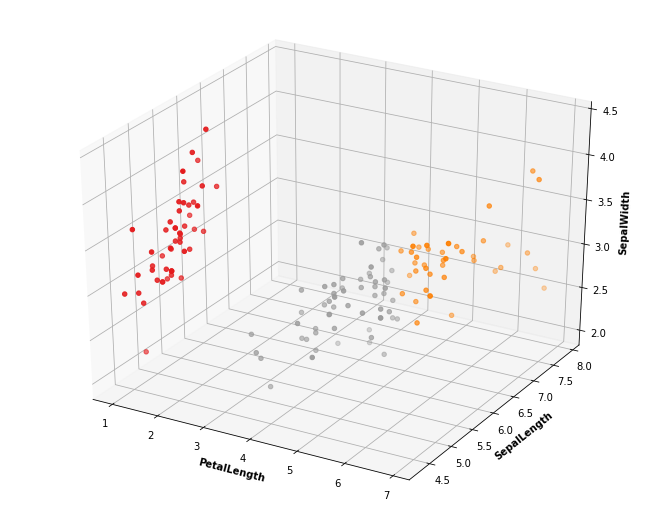

In [8]:
#SepalLength, SepalWidth and PetalLength
fig = plt.figure(figsize = (9, 7))
ax = Axes3D(fig)

iris_sub = iris_x.drop(['PetalWidthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

cmap = ListedColormap(sns.color_palette("Set1"))

ax.scatter(iris_sub.PetalLengthCm, iris_sub.SepalLengthCm, iris_sub.SepalWidthCm, c=y_pred, cmap=cmap)

ax.set_xlabel("PetalLength", fontweight ='bold')
ax.set_ylabel("SepalLength", fontweight ='bold')
ax.set_zlabel("SepalWidth", fontweight ='bold')

plt.show()

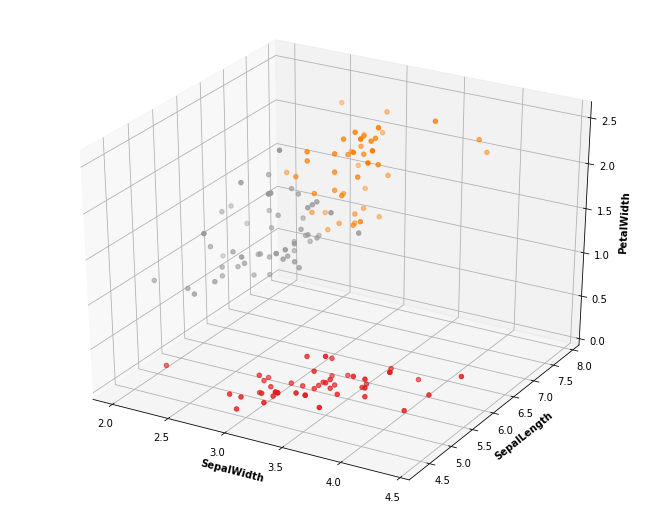

In [9]:
#SepalLength, SepalWidth and PetalWidth
fig = plt.figure(figsize = (9, 7))
ax = Axes3D(fig)

iris_sub = iris_x.drop(['PetalLengthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

cmap = ListedColormap(sns.color_palette("Set1"))

ax.scatter(iris_sub.SepalWidthCm, iris_sub.SepalLengthCm, iris_sub.PetalWidthCm, c=y_pred, cmap=cmap)

ax.set_xlabel("SepalWidth", fontweight ='bold')
ax.set_ylabel("SepalLength", fontweight ='bold')
ax.set_zlabel("PetalWidth", fontweight ='bold')

plt.show()

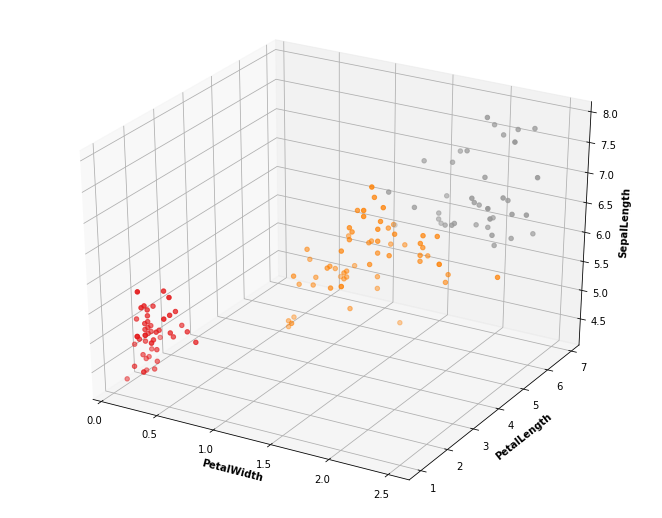

In [10]:
#SepalLength, PetalLength and PetalWidth
fig = plt.figure(figsize = (9, 7))
ax = Axes3D(fig)

iris_sub = iris_x.drop(['SepalWidthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

cmap = ListedColormap(sns.color_palette("Set1"))

ax.scatter(iris_sub.PetalWidthCm, iris_sub.PetalLengthCm, iris_sub.SepalLengthCm, c=y_pred, cmap=cmap)

ax.set_xlabel("PetalWidth", fontweight ='bold')
ax.set_ylabel("PetalLength", fontweight ='bold')
ax.set_zlabel("SepalLength", fontweight ='bold')

plt.show()

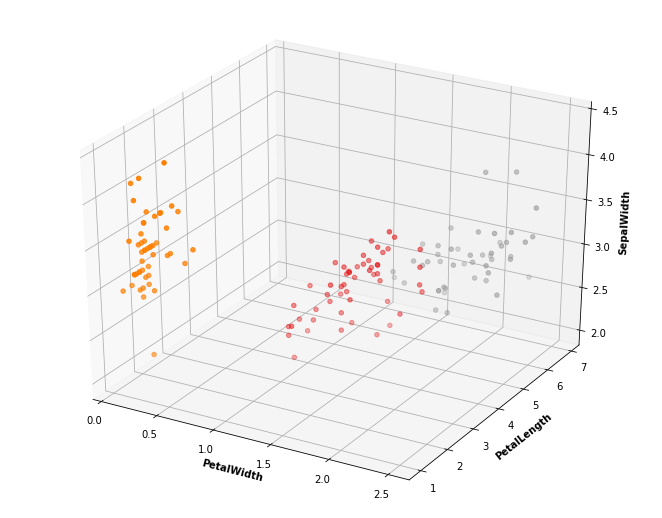

In [11]:
#SepalWidth, PetalLength and PetalWidth
fig = plt.figure(figsize = (9, 7))
ax = Axes3D(fig)

iris_sub = iris_x.drop(['SepalLengthCm'], axis=1)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_sub)
y_pred = kmeans.predict(iris_sub)

cmap = ListedColormap(sns.color_palette("Set1"))

ax.scatter(iris_sub.PetalWidthCm, iris_sub.PetalLengthCm, iris_sub.SepalWidthCm, c=y_pred, cmap=cmap)

ax.set_xlabel("PetalWidth", fontweight ='bold')
ax.set_ylabel("PetalLength", fontweight ='bold')
ax.set_zlabel("SepalWidth", fontweight ='bold')

plt.show()

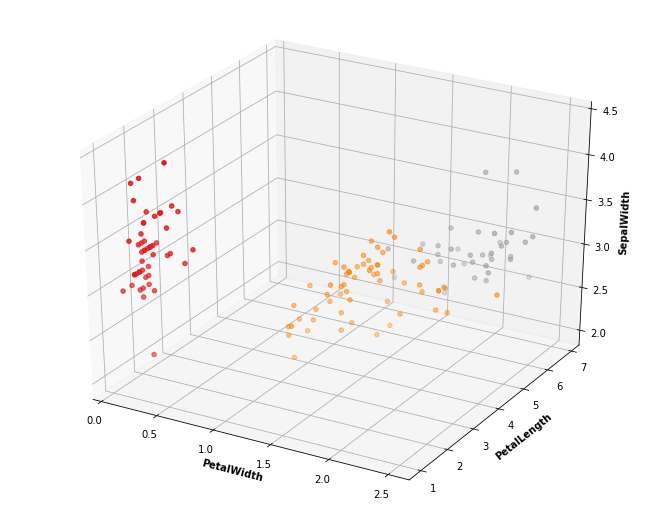

In [18]:
#SepalWidth, PetalLength and PetalWidth
fig = plt.figure(figsize = (9, 7))
ax = Axes3D(fig)

kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_x)
y_pred = kmeans.predict(iris_x)

cmap = ListedColormap(sns.color_palette("Set1"))

ax.scatter(iris_x.PetalWidthCm, iris_x.PetalLengthCm, iris_x.SepalWidthCm, c=y_pred, cmap=cmap)

ax.set_xlabel("PetalWidth", fontweight ='bold')
ax.set_ylabel("PetalLength", fontweight ='bold')
ax.set_zlabel("SepalWidth", fontweight ='bold')

plt.show()